# Regression for Used Car Prices in United States


## Team Background

- Project Grp 08

### Team Members

- Team member 1
    - Name: Richard Anton
    - Email: [rna63@drexel.edu](mailto:rna63@drexel.edu)
    
I am a MS CS student at Drexel. I expect to complete my degree in June 2023 at the end of the next quarter.
I have been a software developer since 1995, and have significant experience with Python.

I have some hands on experience with machine learning, and have taken machine learning, deep learning, artificial intellience, computer vision and DSCI-501 courses at Drexel.

I do not have as much background with exploratory data analysis. I do have a fairly solid mathematical background, including basic statistics.

A number of the prior projects that I have worked on have been focused on classification, for example of images or sentiment analysis of textual data.

Since much of my experience with handling data sets for machine learning problems has been through graduate CS courses, I have implemented them typically without a dependency on anything but NumPy and matplotlib for visualizing results, which means I have limited experience with existing common tools like scikit-learn. 

I am competent at using LaTex, but not an advanced user.

I have significant experience with NumPy and some experience using Pandas. I also have experience with matplotlib for visualizing aspects of data, but less with Seaborn.

The areas and skills I would like to grow through this project are:

1. More hands-on experience with scikit-learn and Pandas libraries.
2. More practice with visualization tools, such as matplotlib and Seaborn.
3. More practical experience with investigating a dataset, i.e. what data cleaning is needed and what relationships can be discovered in the data.
4. Experience with a practical machine learning regression problem.
5. Feature selection techniques to make machine learning problems more effective.

In [2]:
# setup imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

import random



In [3]:
sns.set(style="darkgrid")

In [4]:
from IPython.display import display, HTML

In [5]:
class Heading(object):
    template = """<div style="float: left; padding: 10px;">
    <h{size}>{0}</h{size}>
    </div>"""
    def __init__(self, txt, size):
        self.txt = txt
        self.size = size
        
    def _repr_html_(self):
        return self.template.format(self.txt, size=self.size)
    
    def __repr__(self):
        return self.txt

def show_heading(txt, size=2):
    display(Heading(txt, size=size))

In [6]:
dataset_path = "craigslist_sampled_cleaned_2023_03_05_19_07_36.csv"
target_col = 'price'

In [7]:
# load dataset
orig_df = pd.read_csv(dataset_path)
df = orig_df.copy()
# show a sample for sanity check
df.head()

,price,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,34590.0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,16590.0,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,7800.0,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,27995.0,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,500.0,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


In [8]:
# split into input data and output values
X_all = df.drop(columns=[target_col])
y_all = df[target_col]

show_heading("X", size=2)
display(X_all)
show_heading("y", size=2)
display(y_all)

X

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.000000,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.000000,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.000000,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.000000,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.000000,clean,other,4wd,full-size,bus,green,al
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4029,2018.0,ford,ecosport titanium awd,good,4 cylinders,gas,38450.000000,salvage,automatic,fwd,full-size,SUV,black,wy
4030,2002.0,ford,f 350,good,6 cylinders,diesel,284097.166778,clean,manual,4wd,full-size,sedan,white,wy
4031,2012.0,mazda,mx-5 miata grand touring,good,6 cylinders,gas,29993.000000,clean,other,rwd,full-size,other,silver,wy
4032,2005.0,honda,civic,good,6 cylinders,gas,236787.000000,clean,automatic,4wd,full-size,coupe,white,wy


y

0       34590.0
1       16590.0
2        7800.0
3       27995.0
4         500.0
         ...   
4029     8550.0
4030     6500.0
4031    19990.0
4032     4277.0
4033     7477.0
Name: price, Length: 4034, dtype: float64

In [9]:
# import preprocessing from sklearn
from sklearn import preprocessing

In [10]:
# determine types of columns
numeric_cols = X_all.select_dtypes(include=['int', 'float']).columns
cat_cols = X_all.select_dtypes(include=['object']).columns
bool_cols = X_all.select_dtypes(include=['bool']).columns

show_heading("Column Types")

for col in X_all.columns:
    print(f"Column '{col}' dtype={X_all[col].dtype}")

print("numeric_cols:", numeric_cols)
print("cat_cols:", cat_cols)
print("bool_cols:", bool_cols)

all_cols = set()
all_cols = all_cols.union(set(numeric_cols))
all_cols = all_cols.union(set(cat_cols))
all_cols = all_cols.union(set(bool_cols))

check_cols = set(X_all.columns)

if all_cols != check_cols:
    print("ERROR! missing columns")
else:
    print("Column typing done.")

all_cols

Column Types

Column 'year' dtype=float64
Column 'make' dtype=object
Column 'model' dtype=object
Column 'condition' dtype=object
Column 'cylinders' dtype=object
Column 'fuel' dtype=object
Column 'odometer' dtype=float64
Column 'title_status' dtype=object
Column 'transmission' dtype=object
Column 'drive' dtype=object
Column 'size' dtype=object
Column 'type' dtype=object
Column 'paint_color' dtype=object
Column 'state' dtype=object
numeric_cols: Index(['year', 'odometer'], dtype='object')
cat_cols: Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')
bool_cols: Index([], dtype='object')
Column typing done.


{'condition',
 'cylinders',
 'drive',
 'fuel',
 'make',
 'model',
 'odometer',
 'paint_color',
 'size',
 'state',
 'title_status',
 'transmission',
 'type',
 'year'}

In [11]:
# We are using category_encoders package for one-hot encoding.
# https://contrib.scikit-learn.org/category_encoders/

# uncomment and run this if needed.
!pip install category_encoders

In [12]:
# TODO: cleanup testing out one hot
#enc = preprocessing.OneHotEncoder()
#enc.fit(X)

import category_encoders as ce

In [13]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()

In [14]:
# normalize the numerical columns
from sklearn.preprocessing import StandardScaler

# TODO: remove if not using.
def normalize_numeric_cols(df):
    
    for col in numeric_cols:
        # TODO: is this the kind of scalar we want?
        scaler = StandardScaler()

        scaler.fit(np.array(df[col]).reshape(-1,1))
        df[col] = scaler.transform(np.array(df[col]).reshape(-1,1))
    
    return df


In [15]:
# Convert categorical columns to Pandas category type

# TODO; make sure this exclude's boolean columns
cats = X_all.select_dtypes(exclude=np.number).columns.tolist()
print("cats:")
display(cats)
for col in cats:
    X_all[col] = X_all[col].astype('category')

display(X_all.dtypes)
display(X_all.head())

cats:


['make',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'title_status',
 'transmission',
 'drive',
 'size',
 'type',
 'paint_color',
 'state']

year             float64
make            category
model           category
condition       category
cylinders       category
fuel            category
odometer         float64
title_status    category
transmission    category
drive           category
size            category
type            category
paint_color     category
state           category
dtype: object

,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
0,2016.0,chevrolet,silverado 1500 double,good,6 cylinders,gas,29499.0,clean,other,4wd,full-size,pickup,silver,al
1,2013.0,lincoln,mkz sedan 4d,good,6 cylinders,gas,61087.0,clean,other,fwd,full-size,sedan,red,al
2,2005.0,honda,accord ex-l,excellent,4 cylinders,gas,155000.0,clean,manual,4wd,full-size,sedan,white,al
3,2012.0,ford,f250 super duty,good,6 cylinders,gas,47380.0,clean,automatic,4wd,full-size,sedan,white,al
4,2021.0,ford,SPECIAL FINANCE PROGRAM 2020,fair,other,other,1400.0,clean,other,4wd,full-size,bus,green,al


## Data Dictionary

These are the columns we used from the Craigslist dataset.

|     Name     |  dtype   | Description | Null % | Notes |
|--------------|----------|--------------|--------------|--------------|
| price | float64 | Listed sale price | 0.0 |  | 
| year | float64 | Year of manufacture | 0.002823 | n/a |
| make | category | Auto manufacturer name | 0.041337 | Renamed from manufacturer |
| model | category | Car model name | 0.012362 | n/a |
| condition | category | Listed condition of vehicle | 0.407852 | n/a |
| cylinders | category | Number of engine cylinders | 0.416225 | n/a |
| fuel | category | Type of fuel used by vehicle (i.e. gas, deisel, electric) | 0.007058 | n/a |
| odometer | float64 | Odometer mileage of vehicle | 0.010307 | n/a |
| title_status | category | Status of vehicle title (i.e. clean, salvage) | 0.019308 | n/a |
| transmission | category | Type of vehicle transmission (i.e. automatic, manual) | 0.005988 | n/a |
| drive | category | Drive type of vehicle (i.e. fwd, 4wd) | 0.305863 | n/a |
| size | category | Size of vehicle(i.e. full-size) | 0.717675 | n/a |
| type | category | Vehicle type, (i.e. sedan,pickup) | 0.217527 | n/a |
| paint_color | category | Exterior paint color of vehicle | 0.305011 | n/a |
| state | category | State of vehicle location(i.e. WA, PI) | 0.000000 | n/a |

### Unused Columns

These columns we dropped after EDA before cleaning the data set.


    'id', 'url', 'region', 'VIN', 'region_url', 'county', 'lat', 'long', 'description', 'image_url', 'posting_date'
    
    
We dropped id, url, VIN, image_url because they are likely unique to each listing and uninformative.

We dropped posting_date because the dataset only has data from a limited time frame so this field is not likely to have a long enough date range to determine things like seasonality.


We dropped the columns region, region_url, county, lat, and long so that we could just use state as a single more easily usable column for the effect of the vehicle location on price.



In [16]:
# normalize_numeric_cols(X_all)
# X_all[numeric_cols]

In [17]:
# Train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=193)


In [18]:
# # try a model to see how it works as a baseline
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
# rf_model = RandomForestRegressor(max_depth=10)
# rf_model.fit(X_train, y_train)

In [19]:
# predict_train = rf_model.predict(X_train)
# predict_test  = rf_model.predict(X_test)

In [20]:
# print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
# print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

In [21]:
# plt.figure(figsize=(20,4))
# feat_importances = pd.Series(rf_model.feature_importances_, index = X_train.columns)
# feat_importances.nlargest(6).plot(kind='barh');

In [22]:
# do that over as a pipeline

In [23]:
from sklearn.compose import ColumnTransformer 
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [24]:
# encode the categorical variables as one-hot
# one_hot_enc = ce.OneHotEncoder(cols=cat_cols,use_cat_names=True)
# X_all = one_hot_enc.fit_transform(X_all)
# X_all.head()



In [25]:
# TODO: try ("selector", SelectPercentile(chi2, percentile=50)),

# TODO: try embedding instead
# https://github.com/cpa-analytics/embedding-encoder

# TODO: switching to LeaveOneOut becuase it makes feature importance output easier.
pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    ("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols)
                                ])

In [28]:
#!pip install --user xgboost
# try to get an up to date version.
#!pip install --user --upgrade xgboost

  Using cached xgboost-1.7.4-py3-none-macosx_12_0_arm64.whl (1.6 MB)


In [29]:
import xgboost as xgb

In [30]:
# NOTE: On my mac that gets me an XGBoost version with no GPU support,
# so I had to check out from Git and build it manually.

# on the Mac GPUs (at least on my M2 macbook air), the CUDA libraries that XGBoost uses do not support the GPU.
# This means we are stuck with CPU for XGBoost or run it on something else.
import platform
platform.processor()
plat = platform.system()
print("Platform: ", plat)


Platform:  Darwin


In [47]:
xgb_pre_process = pre_process 

# hyperparameters for XGBoost
# set objective and enable GPU acceleration if available.
plat = platform.system()

# TODO: fix,
# if plat == 'Darwin':
#     params = {"objective": "reg:squarederror"}
# else:
#     params = {"objective": "reg:squarederror", "tree_method": "gpu_hist"}
params = {"objective": "reg:squarederror"}

# Use "gpu_hist" for training the model.
xgb_reg = xgb.XGBRegressor(objective="reg:squarederror")


In [32]:
# Setup pipelines for comparison


linear_pipeline = Pipeline(steps=[
                                  ('pre_processing',pre_process),
                                  ('reg', LinearRegression())
                                 ])

ridge_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 
                                 ('reg', SGDRegressor(penalty="l2"))
                                 ])

lasso_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', SGDRegressor(penalty="l1"))
                                 ])


rf_pipeline = Pipeline(steps=[('pre_processing',pre_process),
                                 ('reg', RandomForestRegressor(max_depth=10,random_state=191))
                                 ])


xgb_pipeline = Pipeline(steps=[('xgb_pre_processing',xgb_pre_process),
                                 ('reg', xgb_reg)
                                 ])

pipelines = {
    'linear':linear_pipeline,
    'ridge': ridge_pipeline,
    'lasso': lasso_pipeline,
    'random_forest': rf_pipeline,
    'xgboost': xgb_pipeline
}


In [33]:
from sklearn.model_selection import cross_validate

In [34]:
def cross_validate_pipeline(label, pipeline):    
    # scoring = "neg_mean_absolute_percentage_error"
    scoring = "neg_mean_squared_error"
    n_cv_folds = 3

    print("cross validate for:", label)
    result = cross_validate(pipeline, X_all, y_all, cv=n_cv_folds, scoring=scoring)
    display(result)

    return result

In [35]:
# #Display some prediction samples
# samples = X_test.copy()
# samples[target_col] = y_test
# #pd.concat([y_test, X_test],axis=0)
# samples['predicted_price'] = predictions

# display(samples)


In [36]:
def plot_residuals(predict_train, predict_test):

    plt.scatter(
        predict_train,
        predict_train - y_train,
        c='blue',
        marker='o',
        label='Training data')

    plt.scatter(
        predict_test,
        predict_test - y_test,
        c='lightgreen',
        marker='s',
        label='Test data')
    plt.xlabel('Predicted values')
    plt.ylabel('Residuals')
    plt.legend(loc='upper left')
    plt.hlines(y=0, xmin=-15000, xmax=55000, lw=2, color='red')
    #plt.xlim([-10, 50])
    plt.tight_layout()
    plt.show()



In [37]:

def show_samples(X_vals, y_vals, predictions):
    samples = X_vals.copy()
    samples[target_col] = y_vals
    samples['predicted_price'] = predictions
    display(samples)

    

In [38]:
from sklearn.metrics import r2_score

def score_pipeline(pipeline):
    predict_train = pipeline.predict(X_train)
    predict_test = pipeline.predict(X_test)
    
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    scores = {
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'score': score,
        'r2_score': r2, 
    }
    results = {
        'scores':scores,
        'predict_train': predict_train,
        'predict_test': predict_test
    }
    print("scores:", scores)
    return results

In [39]:
# TODO: save the model(s)

import joblib
#joblib.dump(model, './rf_model.pkl')

# load the model somewhere else
# In other notebooks 
#model = joblib.load('PATH/TO/rf_model.pkl')
#new_prediction = model.predict(new_data)

In [40]:
def eval_pipeline(label, pipeline):
    cross_validate_pipeline(label, pipeline)
    
    rmod = pipeline.fit(X_train,y_train)
    display(rmod)
    
    results = score_pipeline(pipeline)
     
    show_samples(X_test, y_test, results['predict_test'])
    plot_residuals(results['predict_train'], results['predict_test'])
    
    return rmod, results

Evaluating linear

cross validate for: linear


{'fit_time': array([0.06520486, 0.04776716, 0.05496693]),
 'score_time': array([0.0045011 , 0.00420284, 0.00420904]),
 'test_score': array([-1.07874546e+08, -9.33861758e+07, -1.22048919e+08])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', LinearRegression())])

RMSE of train data:  5169.910541970449
RMSE of test data:  10082.66197288941
model score: 0.460
R2 score 0.4601114918060122
scores: {'train_rmse': 5169.910541970449, 'test_rmse': 10082.66197288941, 'score': 0.4601114918060122, 'r2_score': 0.4601114918060122}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,33659.491902
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,22349.328933
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,13975.420373
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,4460.783663
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-6208.516177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,25429.778370
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,22566.166983
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,31693.189620
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,1742.878832


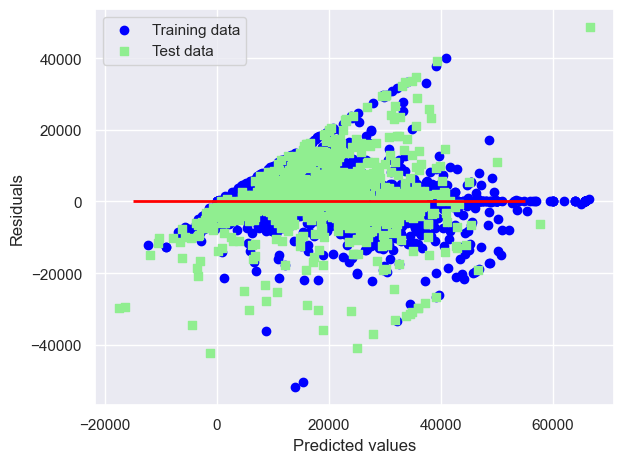

Evaluating ridge

cross validate for: ridge


{'fit_time': array([0.11814904, 0.05723405, 0.05580521]),
 'score_time': array([0.00557184, 0.00433898, 0.00421786]),
 'test_score': array([-86699410.3007022 , -72814836.5979602 , -97979991.36297505])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor())])

RMSE of train data:  7863.293928966526
RMSE of test data:  8895.785423989415
model score: 0.580
R2 score 0.5797359263113151
scores: {'train_rmse': 7863.293928966526, 'test_rmse': 8895.785423989415, 'score': 0.5797359263113151, 'r2_score': 0.5797359263113151}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,29234.935978
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,20603.814858
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,30418.177491
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,6030.628989
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-3643.575998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,27982.213132
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,17914.085388
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,34301.603215
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,6003.126358


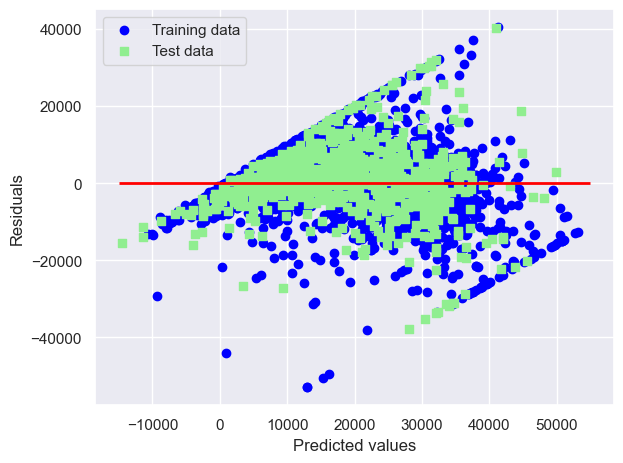

Evaluating lasso

cross validate for: lasso


{'fit_time': array([0.05950212, 0.253232  , 0.21231985]),
 'score_time': array([0.0049448 , 0.004565  , 0.00415397]),
 'test_score': array([-86706434.753836  , -72650601.13348138, -98526227.43408798])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', SGDRegressor(penalty='l1'))])

RMSE of train data:  7254.702642037567
RMSE of test data:  8842.366718090194
model score: 0.585
R2 score 0.5847680974990259
scores: {'train_rmse': 7254.702642037567, 'test_rmse': 8842.366718090194, 'score': 0.5847680974990259, 'r2_score': 0.5847680974990259}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,29536.085233
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,20451.641237
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,28883.161902
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,5622.237620
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,-3847.860442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,27091.444354
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,18354.274382
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,34029.329102
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,5736.996429


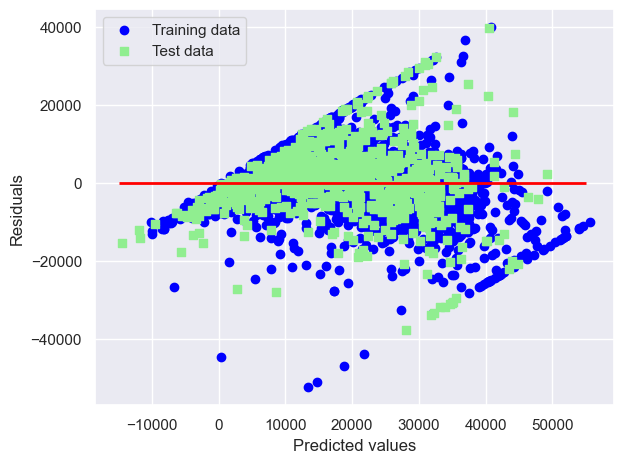

Evaluating random_forest

cross validate for: random_forest


{'fit_time': array([1.07174206, 1.041008  , 1.05835819]),
 'score_time': array([0.01298308, 0.01297498, 0.01264191]),
 'test_score': array([-80603967.1420392 , -61780645.7834055 , -85225574.79710737])}

Pipeline(steps=[('pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odometer'], dtype='object'))])),
                ('reg', RandomForestRegressor(max_depth=10, random_state=191))])

RMSE of train data:  6029.671987038686
RMSE of test data:  8549.260491664412
model score: 0.612
R2 score 0.6118400095464092
scores: {'train_rmse': 6029.671987038686, 'test_rmse': 8549.260491664412, 'score': 0.6118400095464092, 'r2_score': 0.6118400095464092}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,24188.199820
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,18588.487377
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,21608.892615
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,9841.511546
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,4515.481371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,21866.118052
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,11451.092592
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,31322.339802
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,5139.256694


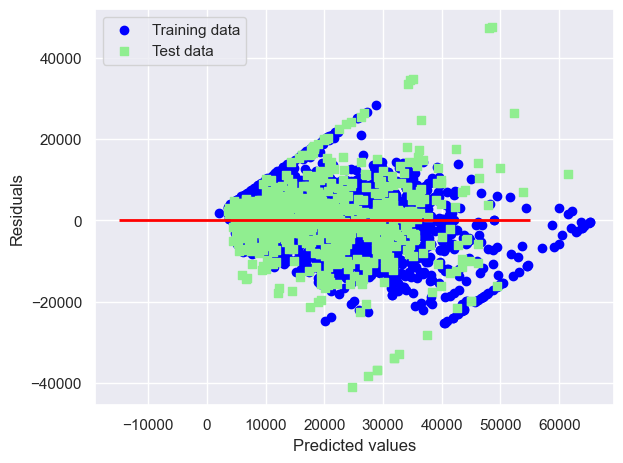

Evaluating xgboost

cross validate for: xgboost


{'fit_time': array([0.19120288, 0.11428189, 0.09220195]),
 'score_time': array([0.00751615, 0.00709295, 0.00656295]),
 'test_score': array([-74986391.74650483, -57110050.72601466, -79536709.29522201])}

Pipeline(steps=[('xgb_pre_processing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('one_hot_encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['make', 'model', 'condition', 'cylinders', 'fuel', 'title_status',
       'transmission', 'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')),
                                                 ('scale_data',
                                                  StandardScaler(),
                                                  Index(['year', 'odomete...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

RMSE of train data:  4923.206798341059
RMSE of test data:  8235.825315058433
model score: 0.640
R2 score 0.639779917410858
scores: {'train_rmse': 4923.206798341059, 'test_rmse': 8235.825315058433, 'score': 0.639779917410858, 'r2_score': 0.639779917410858}


,year,make,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state,price,predicted_price
2211,2016.0,ram,1500,excellent,6 cylinders,gas,44853.0,clean,automatic,4wd,full-size,sedan,silver,mt,28561.0,24104.013672
2720,2016.0,dodge,grand caravan sxt,good,6 cylinders,gas,48000.0,clean,automatic,fwd,full-size,mini-van,black,ny,8500.0,19758.861328
2153,1999.0,dodge,f-150,good,10 cylinders,diesel,56000.0,clean,manual,4wd,full-size,pickup,blue,mo,8900.0,22449.785156
3969,2009.0,honda,accord exl v6,good,8 cylinders,gas,180000.0,clean,automatic,fwd,full-size,sedan,white,wi,5950.0,7308.912598
3363,1994.0,toyota,land cruiser landcruiser,good,6 cylinders,gas,208000.0,clean,automatic,4wd,mid-size,sedan,red,tn,9500.0,4023.434082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3914,2018.0,toyota,rav4,good,4 cylinders,gas,42537.0,clean,automatic,4wd,full-size,SUV,white,wa,22995.0,24440.609375
1639,2012.0,lincoln,mkx,excellent,6 cylinders,gas,85925.0,clean,automatic,fwd,full-size,SUV,white,ky,14450.0,8414.363281
35,2016.0,chevrolet,colorado extended cab,good,6 cylinders,gas,17302.0,clean,other,4wd,full-size,pickup,red,al,29990.0,34122.546875
2674,2003.0,toyota,camry solara,good,6 cylinders,gas,228000.0,clean,automatic,4wd,mid-size,convertible,white,ny,1095.0,6057.184082


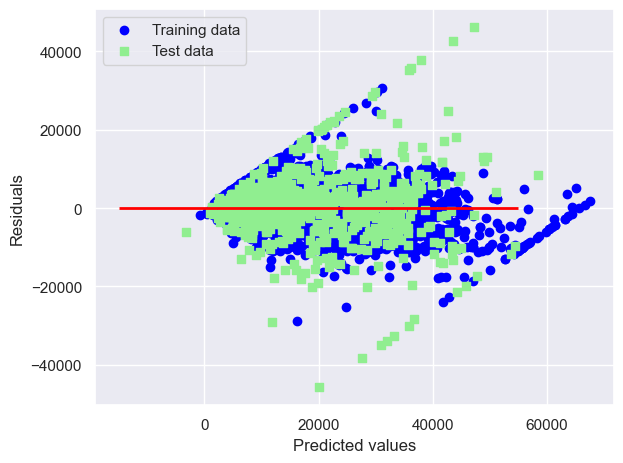

In [41]:
all_results = []
for label, pipeline in pipelines.items():
    show_heading(f"Evaluating {label}", 2)
    rmod, results = eval_pipeline(label, pipeline)
    scores = {'label': label}
    scores.update(results['scores'])
    all_results.append(scores)

In [42]:
df = pd.DataFrame.from_dict(all_results)

show_heading("Pipeline Score Summary")
display(df)

Pipeline Score Summary

,label,train_rmse,test_rmse,score,r2_score
0,linear,5169.910542,10082.661973,0.460111,0.460111
1,ridge,7863.293929,8895.785424,0.579736,0.579736
2,lasso,7254.702642,8842.366718,0.584768,0.584768
3,random_forest,6029.671987,8549.260492,0.611840,0.611840
4,xgboost,4923.206798,8235.825315,0.639780,0.639780


In [43]:
# calculate and plot the feature importance for random forest model.
rf_pipeline = pipelines['random_forest']

rf_model = rf_pipeline['reg']
importances = rf_model.feature_importances_
display(importances.shape)

(1745,)

RangeIndex(start=0, stop=1745, step=1)

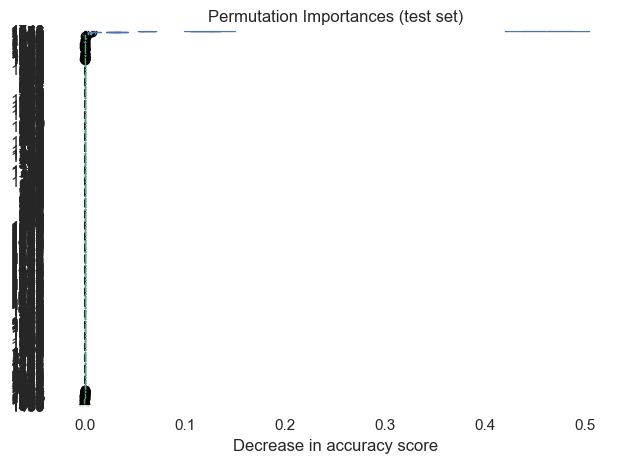

In [44]:
# TODO: this is broken, may drop it if not time.

# Calculate the permutation importance using the random forest.
# The docs describing this are at: 
# https://scikit-learn.org/stable/auto_examples/inspection/plot_permutation_importance.html

from sklearn.inspection import permutation_importance

#X_pre_train = pre_process.fit_transform(X_train)
X_pre_test =  pre_process.transform(X_test)

X_pre_test = X_pre_test.toarray()
result = permutation_importance(
    rf_model, X_pre_test, y_test, n_repeats=5, random_state=4093, n_jobs=8
)

dfc = pd.DataFrame(data=X_pre_test)
columns = dfc.columns
display(columns)


sorted_importances_idx = result.importances_mean.argsort()
importances = pd.DataFrame(
    result.importances[sorted_importances_idx].T,
    columns=columns[sorted_importances_idx],
)
ax = importances.plot.box(vert=False, whis=10)
ax.set_title("Permutation Importances (test set)")
ax.axvline(x=0, color="k", linestyle="--")
ax.set_xlabel("Decrease in accuracy score")
ax.figure.tight_layout()


In [122]:
def xgboost_fit(X_train, y_train, X_test, y_test, enable_cat, n_rounds = 5000):
    # This is the non pipeline version for helping with measuring feature importance.

    # Convert to the format XGBoost lib expects.
    dtrain_reg = xgb.DMatrix(X_train, y_train, enable_categorical=True)
    dtest_reg = xgb.DMatrix(X_test, y_test, enable_categorical=True)

    evals = [(dtest_reg, "validation"), (dtrain_reg, "train")]

    model = xgb.train(
      params=params,
      dtrain=dtrain_reg,
      num_boost_round=n_rounds,
      evals=evals,
      verbose_eval=100, # Every N rounds
      early_stopping_rounds=10  # stop if no improvement to validation loss in 50 rounds.
    )

    predict_test = model.predict(dtest_reg)
    predict_train = model.predict(dtrain_reg)
    
    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
        
    return model
# xgboost_fit() 

In [65]:
# Train a separate model to do feature importance
model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=True) 


[0]	validation-rmse:17086.56529	train-rmse:17606.76023
[100]	validation-rmse:8328.74855	train-rmse:2487.37993
[200]	validation-rmse:8423.06308	train-rmse:1079.44304
[300]	validation-rmse:8435.80463	train-rmse:557.56747
[400]	validation-rmse:8427.01301	train-rmse:285.38116
[500]	validation-rmse:8428.89770	train-rmse:153.75015
[600]	validation-rmse:8429.67176	train-rmse:90.15874
[700]	validation-rmse:8429.84032	train-rmse:51.26835
[800]	validation-rmse:8429.06888	train-rmse:29.45572
[900]	validation-rmse:8429.43882	train-rmse:17.16292
[1000]	validation-rmse:8429.73647	train-rmse:10.15686
[1100]	validation-rmse:8429.58666	train-rmse:6.69802
[1200]	validation-rmse:8429.61007	train-rmse:4.42691
[1300]	validation-rmse:8429.62417	train-rmse:3.13471
[1400]	validation-rmse:8429.65100	train-rmse:2.46325
[1500]	validation-rmse:8429.64871	train-rmse:2.10250
[1600]	validation-rmse:8429.63423	train-rmse:1.95517
[1700]	validation-rmse:8429.62327	train-rmse:1.90234
[1800]	validation-rmse:8429.61951	tr

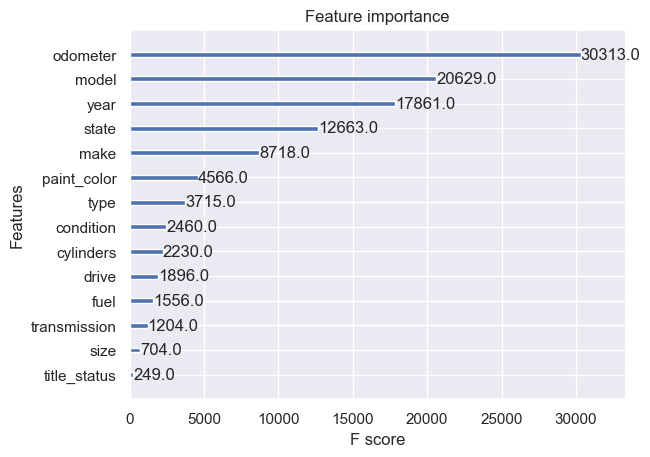

In [52]:
n_features_max = 50

from xgboost import plot_importance
plot_importance(model, max_num_features=20)

# Alternate version
if False:
    feature_important = model.get_score(importance_type='weight')
    keys = list(feature_important.keys())
    values = list(feature_important.values())

    data = pd.DataFrame(data=values, index=keys, columns=["score"])
    data = data.sort_values(by = "score")#, ascending=False)

    display(data)

    plt.barh(data.index, data['score'])
    plt.xlabel("Xgboost Feature Importance")


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA
    
n_pca_comp = 10

# Using LeaveOneOut and PCA
cat_encoder = Pipeline([
    ('LOO', ce.LeaveOneOutEncoder(return_df=False)),
    ('PCA', PCA(n_components = n_pca_comp,random_state=193))
])

alt_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])

In [ ]:
def train_random_forest(xreg_train, yreg_train, xreg_test, yreg_test):


    RF_regressor = Pipeline([('pre_processing',alt_pre_process),
                             ('reg', RandomForestRegressor(max_depth=15,random_state=191))])

    RF_regressor.fit(xreg_train, yreg_train)

    predict_train = RF_regressor.predict(xreg_train)
    predict_test = RF_regressor.predict(xreg_test)

    train_rmse = mean_squared_error(yreg_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(yreg_test, predict_test)**(0.5)
  
    score = pipeline.score(X_test, y_test)
    r2 = r2_score(y_test, predict_test)
    
    train_rmse = mean_squared_error(y_train, predict_train)**(0.5)
    test_rmse = mean_squared_error(y_test, predict_test)**(0.5)
    
    print('RMSE of train data: ', train_rmse)
    print('RMSE of test data: ',  test_rmse)
    print("model score: %.3f" % score)
    print("R2 score", r2)
    
    
    return RF_regressor


#alt_pre_process.fit(X_train, y_train)

# PCA Does not support sparse input.
# if False: # NEEDED for one hot encoder
#     X_pre_train =  alt_pre_process.transform(X_train).toarray()
#     X_pre_test =  alt_pre_process.transform(X_test).toarray()

In [ ]:
print("Random Forest")
train_random_forest(X_train, y_train, X_test, y_test)    

In [128]:
def score_xgb_model(X_train, y_train, X_test, y_test):
    n_rounds = 5000    
    xgb_model = xgboost_fit(X_train, y_train, X_test, y_test, enable_cat=False, n_rounds=n_rounds) 
    return xgb_model

In [139]:
alt_pre_process.fit(X_train, y_train)

X_pre_train =  alt_pre_process.transform(X_train)
X_pre_test =  alt_pre_process.transform(X_test)
print("XGBoost")
score_xgb_model(X_pre_train, y_train, X_pre_test, y_test)

XGBoost
[0]	validation-rmse:17129.22418	train-rmse:17301.41292
[100]	validation-rmse:8483.65762	train-rmse:1815.79373
[200]	validation-rmse:8530.74543	train-rmse:767.15851
[300]	validation-rmse:8544.13347	train-rmse:344.89561
[400]	validation-rmse:8556.81389	train-rmse:161.91910
[500]	validation-rmse:8561.30432	train-rmse:80.29748
[600]	validation-rmse:8562.96106	train-rmse:40.21064
[700]	validation-rmse:8563.11766	train-rmse:20.30156
[800]	validation-rmse:8563.36030	train-rmse:10.34936
[900]	validation-rmse:8563.40177	train-rmse:5.72536
[1000]	validation-rmse:8563.48176	train-rmse:3.40369
[1100]	validation-rmse:8563.51240	train-rmse:2.35639
[1200]	validation-rmse:8563.55012	train-rmse:2.01231
[1300]	validation-rmse:8563.55997	train-rmse:1.90513
[1400]	validation-rmse:8563.56832	train-rmse:1.87693
[1500]	validation-rmse:8563.57142	train-rmse:1.86990
[1600]	validation-rmse:8563.57151	train-rmse:1.86788
[1700]	validation-rmse:8563.57196	train-rmse:1.86731
[1800]	validation-rmse:8563.5721

In [145]:
from sklearn.svm import SVR

def fit_svm(svr, X_train, y_train, X_test, y_test):
    svm_model = svr.fit(X_train, y_train)

    predict_train = svm_model.predict(X_train)
    predict_test = svm_model.predict(X_test)


    print('RMSE of train data: ', mean_squared_error(y_train, predict_train)**(0.5))
    print('RMSE of test data: ',  mean_squared_error(y_test, predict_test)**(0.5))

    r2 = r2_score(y_test, predict_test)
    print('R2 Score of test data:', r2)
    
    return svm_model

In [ ]:

svm_pre_process = ColumnTransformer(remainder='passthrough',
                                transformers=[
                                    #("leave_one_out_encoder", ce.LeaveOneOutEncoder(return_df=False), cat_cols),
                                    ("cat_encoder", cat_encoder, cat_cols),
                                    #("one_hot_encoder", OneHotEncoder(handle_unknown="ignore"), cat_cols),
                                    ('scale_data', StandardScaler(), numeric_cols),
                                ])
svm_pre_process.fit(X_train, y_train)

X_pre_train =  svm_pre_process.transform(X_train)
X_pre_test =  svm_pre_process.transform(X_test)

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)


svm_model = fit_svm(svr_lin, X_pre_train, y_train, X_pre_test, y_test)